# CPC251 Project Part 1

# Group Cardio_1 Members

1.   Hana Shah Binti Faizal Shah [153583]
2.   Jazreel Ooi Sue Ching [150740]
3.   Logen Naidu S/O Suresh [152860]
4.   Siti Adibah Binti Zaini [152978]

# Data Analysis
# Data Visualization

<AxesSubplot:xlabel='Mode', ylabel='LB'>

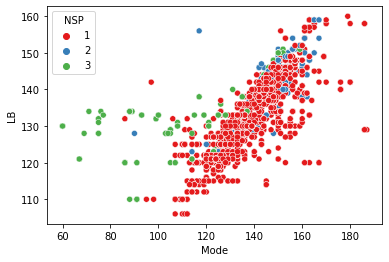

In [1]:
# Import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('ctg.csv')

sns.scatterplot(x='Mode',y='LB',palette='Set1',data=df, hue='NSP')

<AxesSubplot:xlabel='Mean', ylabel='LB'>

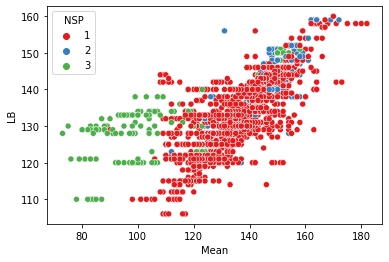

In [2]:
sns.scatterplot(x='Mean',y='LB',palette='Set1',data=df, hue='NSP')


<AxesSubplot:xlabel='ASTV', ylabel='ALTV'>

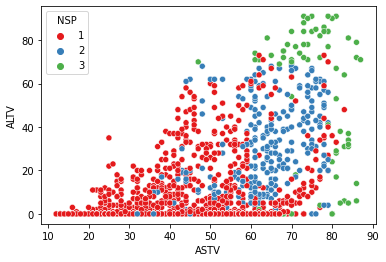

In [3]:
sns.scatterplot(x='ASTV',y='ALTV',palette='Set1',data=df, hue='NSP')

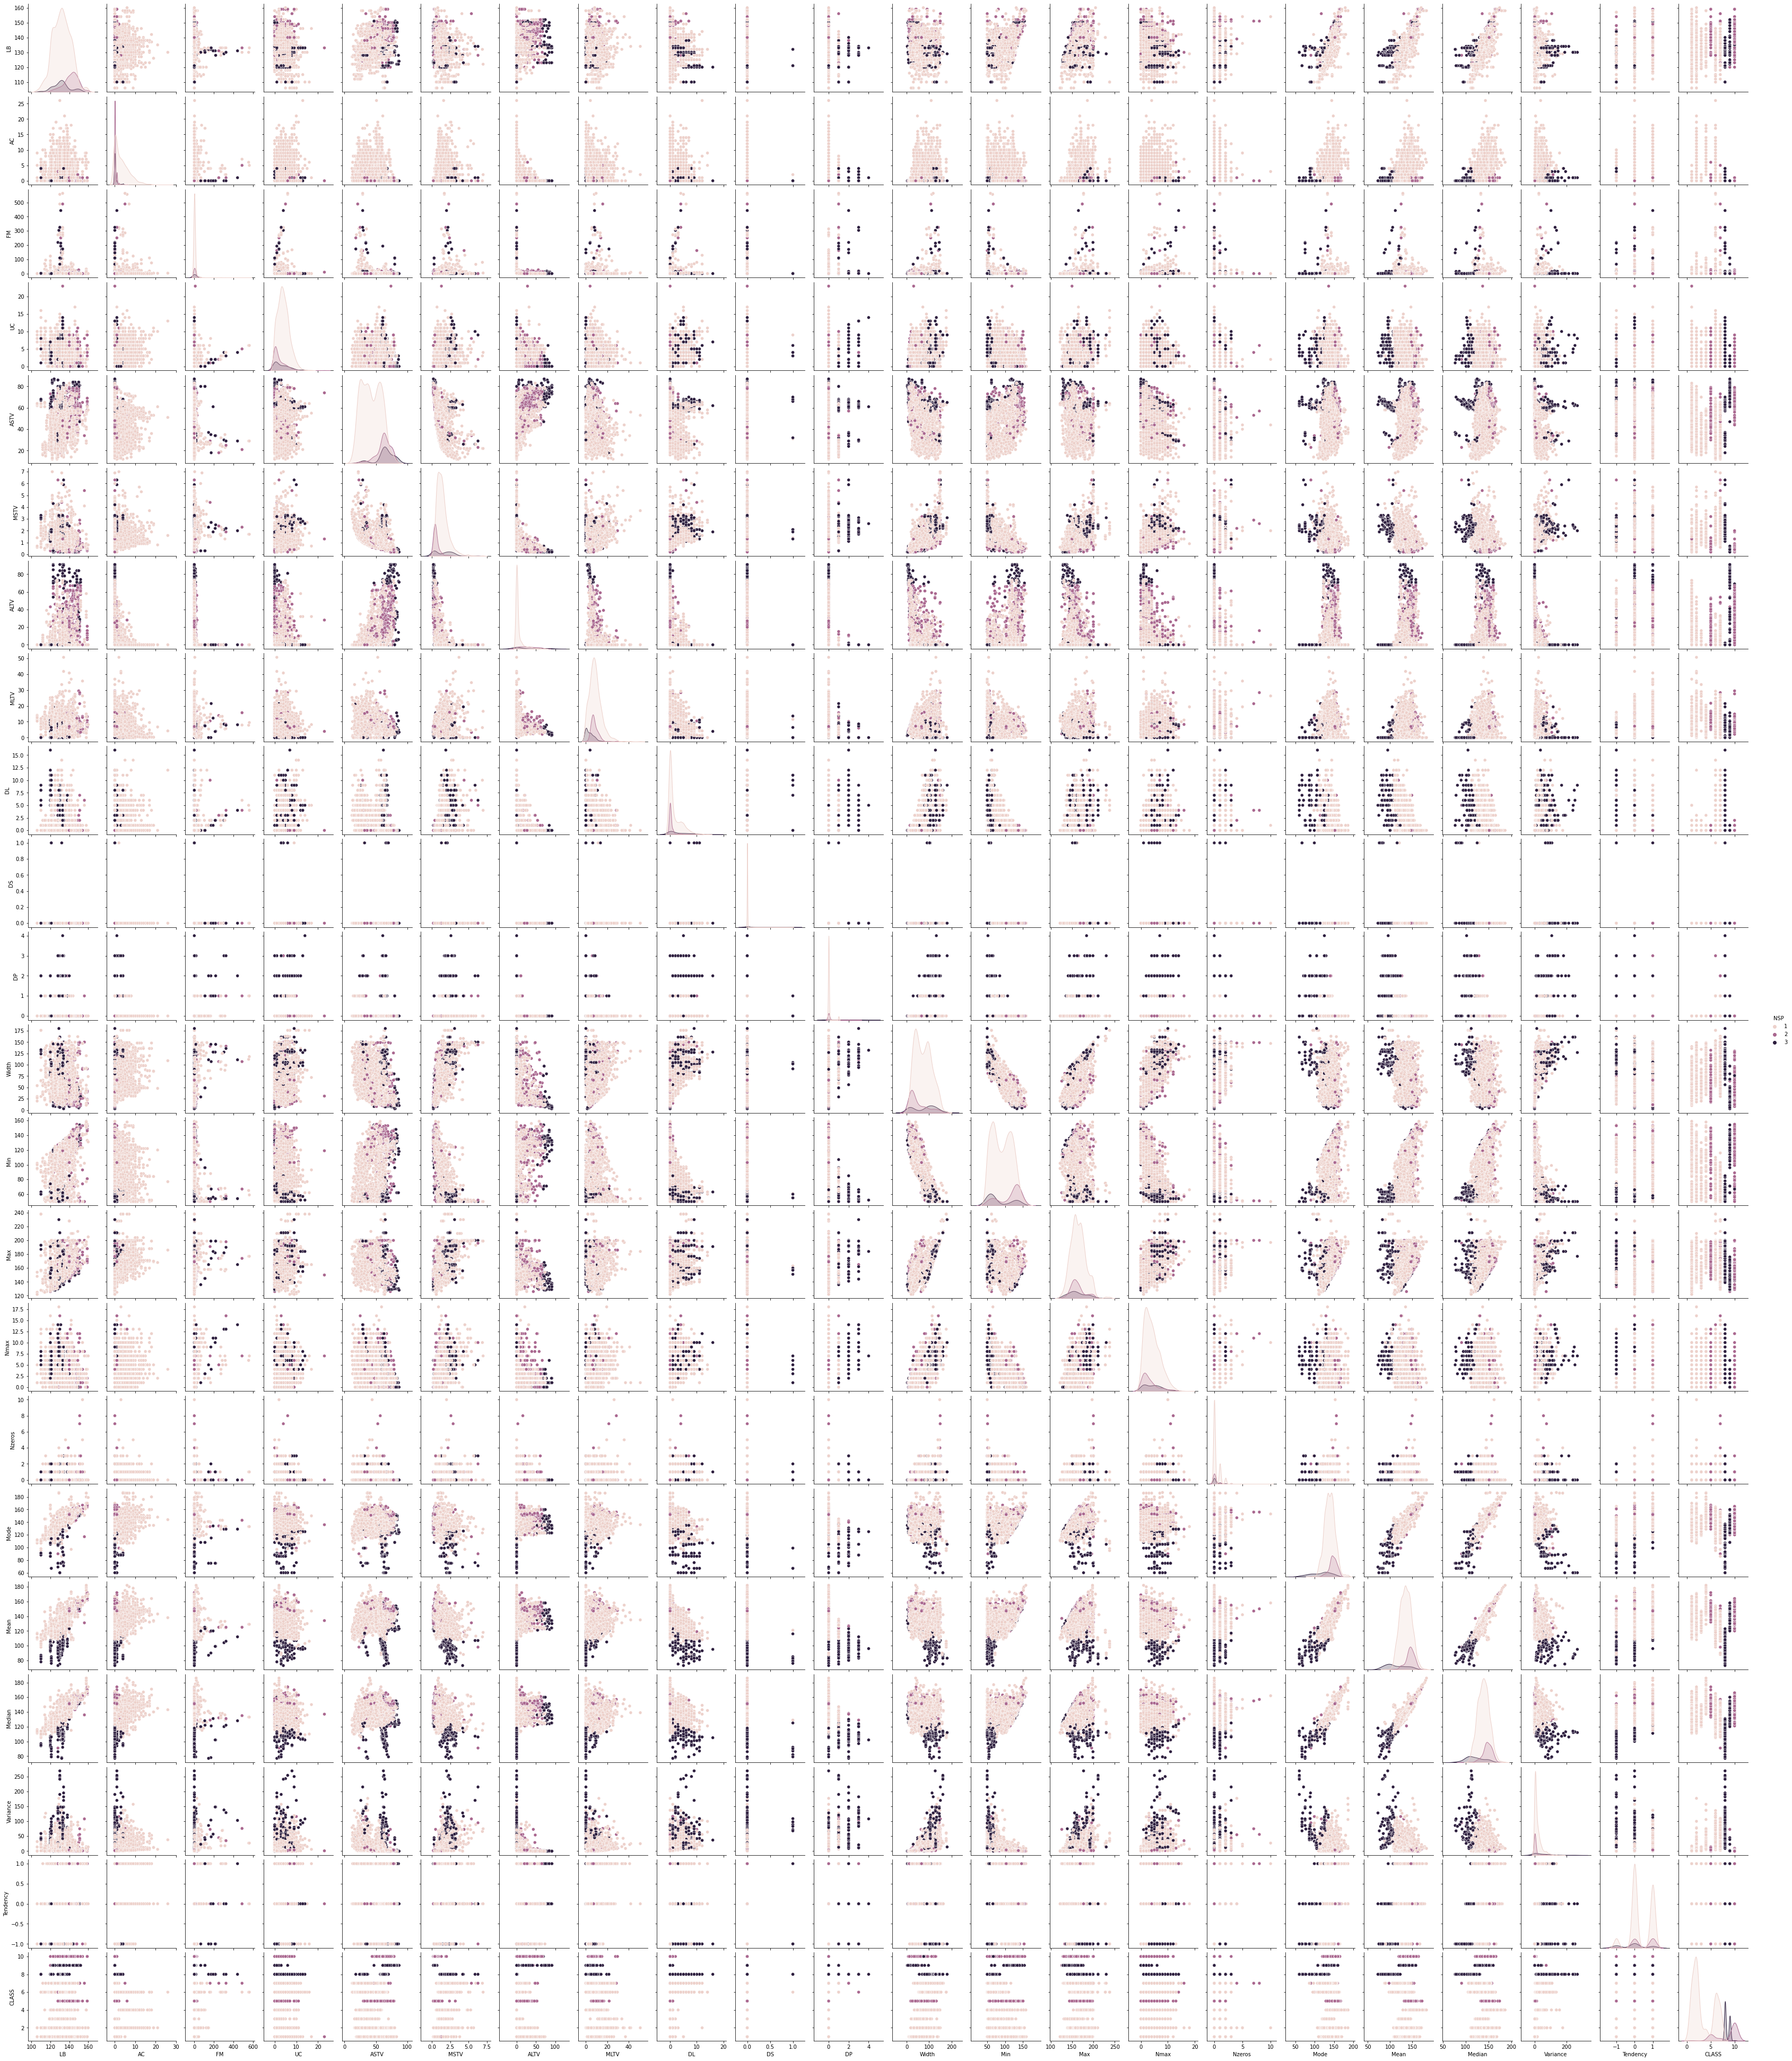

In [4]:
sns.pairplot(
    data=df, 
    aspect=.85,
    hue='NSP');

# Feature Selection
Feature Selection using ANOVA

In [5]:
# Import the standard modules
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')

Feature 0: 94.721174
Feature 1: 130.720237
Feature 2: 1.547298
Feature 3: 45.007004
Feature 4: 281.835352
Feature 5: 98.517580
Feature 6: 245.337451
Feature 7: 58.818570
Feature 8: 59.777627
Feature 9: 22.311595
Feature 10: 467.882575
Feature 11: 44.708847
Feature 12: 68.895452
Feature 13: 1.805563
Feature 14: 9.752220
Feature 15: 2.925587
Feature 16: 230.937845
Feature 17: 254.275705
Feature 18: 211.995039
Feature 19: 124.450809
Feature 20: 39.808190
Feature 21: 738.596837


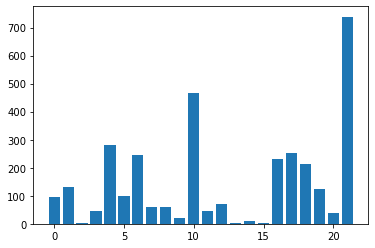

In [7]:
# anova f-test feature selection for numerical data
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from matplotlib import pyplot
 
# load the dataset
def load_dataset(filename):
    # load the dataset as a pandas DataFrame
    data = read_csv(filename)
    # retrieve numpy array
    dataset = data.values
    # split into input (X) and output (y) variables
    X = dataset[:, :-1]
    y = dataset[:,-1]
    return X, y
 
# feature selection
def select_features(X_train, y_train, X_test):
    # configure to select all features
    fs = SelectKBest(score_func=f_classif, k='all')
    # learn relationship from training data
    fs.fit(X_train, y_train)
    # transform train input data
    X_train_fs = fs.transform(X_train)
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs
 
# load the dataset
X, y = load_dataset('ctg.csv')
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

# The best number of features based on the accuracy measure of each model

## Decision Tree

In [ ]:
#reading the file
cardio = pd.read_csv('ctg.csv')

In [ ]:
#set the response variable
y = cardio['NSP']

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

#check the accuracy measure of the decision tree model based on different number of features
def check(X,y):
    seed_num = 10
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num) # random_state is set to a value for reproducible␣output
    model_dt = DecisionTreeClassifier(criterion='gini', random_state = seed_num) 
    model_dt.fit(X_train, y_train)
    y_pred = model_dt.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
#The features are assigned based on the order of its score which indicates its relevancy (highest to lowest)
t1 = check(cardio[['CLASS']],y)
t2 = check(cardio[['CLASS', 'MLTV']],y)
t3 = check(cardio[['CLASS', 'MLTV', 'DL']],y)
t4 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP']],y)
t5 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean']],y)
t6 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode']],y)
t7 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median']],y)
t8 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC']],y)
t9 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance']],y)
t10 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS']],y)
t11 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB']],y)
t12 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min']],y)
t13 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV']],y)
t14 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV']],y)
t15 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC']],y)
t16 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width']],y)
t17 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width', 'Tendency']],y)
t18 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width', 'Tendency', 'ALTV']],y)
t19 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width', 'Tendency', 'ALTV', 'Nmax']],y)
t20 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width', 'Tendency', 'ALTV', 'Nmax', 'Nzeros']],y)
t21 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width', 'Tendency', 'ALTV', 'Nmax', 'Nzeros', 'Max']],y)
t22 = check(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width', 'Tendency', 'ALTV', 'Nmax', 'Nzeros', 'Max', 'FM']],y)

#Scores is a list that contains the accuracy measure based on different number of features
scores = [t1,t2,t3,t4,t5,t6,t7,t8,t9,t10,t11,t12,t13,t14,t15,t16,t17,t18,t19,t20,t21,t22]

In [ ]:
#The accuracy measure of the decision tree model based on different number of features
for i in range(len(scores)):
    print(scores[i])
    i+1

0.9882629107981221
0.9788732394366197
0.9812206572769953
0.9788732394366197
0.9788732394366197
0.9835680751173709
0.9812206572769953
0.9835680751173709
0.9835680751173709
0.9835680751173709
0.9835680751173709
0.9812206572769953
0.9812206572769953
0.9765258215962441
0.9859154929577465
0.9812206572769953
0.9835680751173709
0.9882629107981221
0.9835680751173709
0.9835680751173709
0.9859154929577465
0.9859154929577465


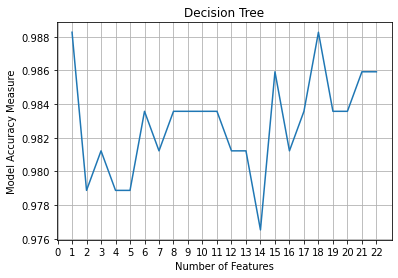

In [ ]:
#The graph of accuracy of the decision tree model based on different number of features
from matplotlib import pyplot as plt 
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
plt.plot(labels,scores)
plt.xticks(np.arange(0, 23, 1))
plt.title("Decision Tree")
plt.ylabel("Model Accuracy Measure")
plt.xlabel("Number of Features")
plt.grid()
plt.show()

## K-Nearest Neighbors

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
#check the accuracy measure of the kNN model based on different number of features
def check2(X,y):
    seed_num = 10
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed_num) # random_state is set to a value for reproducible␣output
    model_knn = KNeighborsClassifier() 
    model_knn.fit(X_train, y_train)
    y_pred = model_knn.predict(X_test)
    return accuracy_score(y_test, y_pred)

In [ ]:
#The features are assigned based on the order of its score which indicates its relevancy (highest to lowest)
s1 = check2(cardio[['CLASS']],y)
s2 = check2(cardio[['CLASS', 'MLTV']],y)
s3 = check2(cardio[['CLASS', 'MLTV', 'DL']],y)
s4 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP']],y)
s5 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean']],y)
s6 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode']],y)
s7 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median']],y)
s8 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC']],y)
s9 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance']],y)
s10 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS']],y)
s11 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB']],y)
s12 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min']],y)
s13 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV']],y)
s14 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV']],y)
s15 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC']],y)
s16 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width']],y)
s17 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width', 'Tendency']],y)
s18 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width', 'Tendency', 'ALTV']],y)
s19 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width', 'Tendency', 'ALTV', 'Nmax']],y)
s20 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width', 'Tendency', 'ALTV', 'Nmax', 'Nzeros']],y)
s21 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width', 'Tendency', 'ALTV', 'Nmax', 'Nzeros', 'Max']],y)
s22 = check2(cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB', 'Min', 'MSTV', 'ASTV', 'UC', 'Width', 'Tendency', 'ALTV', 'Nmax', 'Nzeros', 'Max', 'FM']],y)

#scores2 is a list that contains the accuracy measure based on different number of features
scores2 = [s1,s2,s3,s4,s5,s6,s7,s8,s9,s10,s11,s12,s13,s14,s15,s16,s17,s18,s19,s20,s21,s22]

In [ ]:
#The accuracy measure of the kNN model based on different number of features
for i in range(len(scores2)):
    print(scores2[i])
    i+1

0.9882629107981221
0.9835680751173709
0.9835680751173709
0.9859154929577465
0.9835680751173709
0.9859154929577465
0.9859154929577465
0.9812206572769953
0.9835680751173709
0.9835680751173709
0.9882629107981221
0.9882629107981221
0.9882629107981221
0.9859154929577465
0.9859154929577465
0.9859154929577465
0.9788732394366197
0.9812206572769953
0.9788732394366197
0.9765258215962441
0.9765258215962441
0.9765258215962441


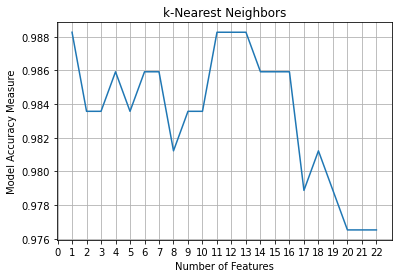

In [ ]:
#The graph of accuracy of the kNN model based on different number of features
from matplotlib import pyplot as plt 
labels = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]
plt.plot(labels,scores2)
plt.xticks(np.arange(0, 23, 1))
plt.title("k-Nearest Neighbors")
plt.ylabel("Model Accuracy Measure")
plt.xlabel("Number of Features")
plt.grid()
plt.show()

Based on both graphs, we can deduct that the best number of features is 11 features because it yields one of the highest accuracy for both models.

In [ ]:
#Display summary statistics of all features
cardio.describe()

LB           AC           FM           UC         ASTV  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    133.303857     2.722484     7.241298     3.659925    46.990122   
std       9.840844     3.560850    37.125309     2.847094    17.192814   
min     106.000000     0.000000     0.000000     0.000000    12.000000   
25%     126.000000     0.000000     0.000000     1.000000    32.000000   
50%     133.000000     1.000000     0.000000     3.000000    49.000000   
75%     140.000000     4.000000     2.000000     5.000000    61.000000   
max     160.000000    26.000000   564.000000    23.000000    87.000000   

              MSTV        ALTV         MLTV           DL           DS  ...  \
count  2126.000000  2126.00000  2126.000000  2126.000000  2126.000000  ...   
mean      1.332785     9.84666     8.187629     1.570085     0.003293  ...   
std       0.883241    18.39688     5.628247     2.499229     0.057300  ...   
min       0.200000     0.00000     0.000000     0.000000     0.000000  ...   
25%       0.700000     0.00000     4.600000     0.000000     0.000000  ...   
50%       1.200000     0.00000     7.400000     0.000000     0.000000  ...   
75%       1.700000    11.00000    10.800000     3.000000     0.000000  ...   
max       7.000000    91.00000    50.700000    16.000000     1.000000  ...   

               Max         Nmax       Nzeros         Mode         Mean  \
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000   
mean    164.025400     4.068203     0.323612   137.452023   134.610536   
std      17.944183     2.949386     0.706059    16.381289    15.593596   
min     122.000000     0.000000     0.000000    60.000000    73.000000   
25%     152.000000     2.000000     0.000000   129.000000   125.000000   
50%     162.000000     3.000000     0.000000   139.000000   136.000000   
75%     174.000000     6.000000     0.000000   148.000000   145.000000   
max     238.000000    18.000000    10.000000   187.000000   182.000000   

            Median     Variance     Tendency        CLASS          NSP  
count  2126.000000  2126.000000  2126.000000  2126.000000  2126.000000  
mean    138.090310    18.808090     0.320320     4.509878     1.304327  
std      14.466589    28.977636     0.610829     3.026883     0.614377  
min      77.000000     0.000000    -1.000000     1.000000     1.000000  
25%     129.000000     2.000000     0.000000     2.000000     1.000000  
50%     139.000000     7.000000     0.000000     4.000000     1.000000  
75%     148.000000    24.000000     1.000000     7.000000     1.000000  
max     186.000000   269.000000     1.000000    10.000000     3.000000  

[8 rows x 23 columns]

# Data Modeling
## K-Nearest Neighbors

In [ ]:
cardio.head()

LB  AC  FM  UC  ASTV  MSTV  ALTV  MLTV  DL  DS  ...  Max  Nmax  Nzeros  \
0  120   0   0   0    73   0.5    43   2.4   0   0  ...  126     2       0   
1  132   4   0   4    17   2.1     0  10.4   2   0  ...  198     6       1   
2  133   2   0   5    16   2.1     0  13.4   2   0  ...  198     5       1   
3  134   2   0   6    16   2.4     0  23.0   2   0  ...  170    11       0   
4  132   4   0   5    16   2.4     0  19.9   0   0  ...  170     9       0   

   Mode  Mean  Median  Variance  Tendency  CLASS  NSP  
0   120   137     121        73         1      9    2  
1   141   136     140        12         0      6    1  
2   141   135     138        13         0      6    1  
3   137   134     137        13         1      6    1  
4   137   136     138        11         1      2    1  

[5 rows x 23 columns]

In [ ]:
# Get the shape of the data
# There are 22 columns (feature variables) with 1 target variable
cardio.shape

(2126, 23)

In [ ]:
# Target variable unique values (i didnt remove the some rows that are full with 0 inside the dataset)
cardio['NSP'].unique()

array([2, 1, 3])

In [ ]:
# Count the empty values in each column
cardio.isna().sum()

LB          0
AC          0
FM          0
UC          0
ASTV        0
MSTV        0
ALTV        0
MLTV        0
DL          0
DS          0
DP          0
Width       0
Min         0
Max         0
Nmax        0
Nzeros      0
Mode        0
Mean        0
Median      0
Variance    0
Tendency    0
CLASS       0
NSP         0
dtype: int64

In [ ]:
# Another way to check any null or missing values
cardio.isnull().values.any()

False

In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

seed_num = 1
y = cardio['NSP']
X = cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB']]

# Feature scaling
# Scale the values in the data to be values between 0 and 1 inclusive
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
# random_state is set to a value for reproducible output.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = seed_num)

print(X_train.shape)
print(X_test.shape)

(1700, 11)
(426, 11)


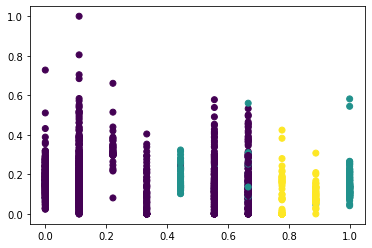

In [ ]:
# Plot the distribution of X_train
from matplotlib import pyplot as plt 
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

In [ ]:
# Fitting KNN into the training set and test set
from sklearn.neighbors import KNeighborsClassifier 
model_knn = KNeighborsClassifier() 
model_knn.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Import the libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = model_knn.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))
print("Accuracy:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[325   1   0]
 [  1  66   1]
 [  1   1  30]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       326
           2       0.97      0.97      0.97        68
           3       0.97      0.94      0.95        32

    accuracy                           0.99       426
   macro avg       0.98      0.97      0.97       426
weighted avg       0.99      0.99      0.99       426

Accuracy:
0.9882629107981221


# Decision Tree

In [ ]:
# X value and y value
y = cardio['NSP']
X = cardio[['CLASS', 'MLTV', 'DL', 'DP', 'Mean', 'Mode', 'Median', 'AC', 'Variance', 'DS', 'LB']]

In [ ]:
from sklearn.model_selection import train_test_split

seed_num = 1

# Split the dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = seed_num) 
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state=seed_num)

# Print the shapes
print("X_train shape: ", X_train.shape)
print("X_val shape: ", X_val.shape) 
print("X_test shape: ", X_test.shape)

X_train shape:  (1360, 11)
X_val shape:  (340, 11)
X_test shape:  (426, 11)


In [ ]:
# Decision Tree
# Parameters set: gini (default)
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier(criterion='gini', random_state = seed_num) 
model_dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [ ]:
# Set parameters to find the optimal model
# Building model with 5 different max_depth values
dt_models = []

# Depth number starts from 3, by incrementing the steps by 1, and stop before 8
depths = np.arange(3,8,1) 

# Loop
for d in depths:
    model = DecisionTreeClassifier(criterion='gini', min_samples_split = 15, max_depth = d, random_state = seed_num)
    model.fit(X_train, y_train)
    dt_models.append(model)

In [ ]:
# Use validation set to determine the best max_depth parameter
best_acc = 0
model_best = None
for m,d in zip(dt_models, depths):
    acc = m.score(X_val, y_val)
    print(f'Decision Tree classifier with max_depth={d} achieves a mean accuracy of {acc}')
    if acc > best_acc: 
        best_acc = acc 
        model_best = m

Decision Tree classifier with max_depth=3 achieves a mean accuracy of 0.9911764705882353
Decision Tree classifier with max_depth=4 achieves a mean accuracy of 0.9941176470588236
Decision Tree classifier with max_depth=5 achieves a mean accuracy of 0.9941176470588236
Decision Tree classifier with max_depth=6 achieves a mean accuracy of 0.9941176470588236
Decision Tree classifier with max_depth=7 achieves a mean accuracy of 0.9941176470588236


In [ ]:
# Predict the model with the best max_depth parameter
y_pred = model_best.predict(X_test)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report: ")
print(classification_report(y_test, y_pred))
print("Accuracy: ")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[326   0   0]
 [  2  66   0]
 [  0   1  31]]
Classification Report: 
              precision    recall  f1-score   support

           1       0.99      1.00      1.00       326
           2       0.99      0.97      0.98        68
           3       1.00      0.97      0.98        32

    accuracy                           0.99       426
   macro avg       0.99      0.98      0.99       426
weighted avg       0.99      0.99      0.99       426

Accuracy: 
0.9929577464788732


In [ ]:
# Plot the tree
from sklearn.tree import plot_tree, export_text 

print(export_text(model_best, feature_names=list(X.columns)))

|--- CLASS <= 7.50
|   |--- CLASS <= 4.50
|   |   |--- Variance <= 1.50
|   |   |   |--- MLTV <= 3.95
|   |   |   |   |--- class: 1
|   |   |   |--- MLTV >  3.95
|   |   |   |   |--- class: 1
|   |   |--- Variance >  1.50
|   |   |   |--- class: 1
|   |--- CLASS >  4.50
|   |   |--- CLASS <= 5.50
|   |   |   |--- Mode <= 161.00
|   |   |   |   |--- class: 2
|   |   |   |--- Mode >  161.00
|   |   |   |   |--- class: 2
|   |   |--- CLASS >  5.50
|   |   |   |--- LB <= 149.50
|   |   |   |   |--- class: 1
|   |   |   |--- LB >  149.50
|   |   |   |   |--- class: 2
|--- CLASS >  7.50
|   |--- CLASS <= 9.50
|   |   |--- LB <= 120.50
|   |   |   |--- Mean <= 122.00
|   |   |   |   |--- class: 3
|   |   |   |--- Mean >  122.00
|   |   |   |   |--- class: 2
|   |   |--- LB >  120.50
|   |   |   |--- class: 3
|   |--- CLASS >  9.50
|   |   |--- class: 2



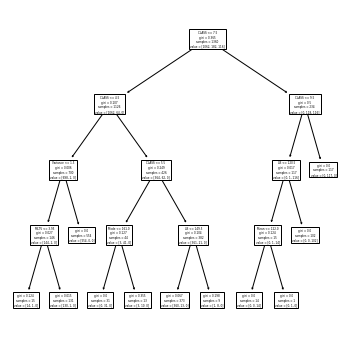

In [ ]:
from matplotlib import pyplot as plt

# increase the value if the size of the image is too small
plt.figure(figsize=(6,6)) 
plot_tree(model_best, feature_names=list(X.columns)) 
plt.show()